In [200]:
from math import floor, isnan

import numpy as np
from importlib_metadata import distribution
from matplotlib.pyplot import xlabel

import nsfg
import thinkplot
import thinkstats2
from code.normal import CorrelationPermute

from code.hypothesis import DiffMeansPermute
from thinkplot import scatter
from thinkstats2 import EvalNormalCdf

ModuleNotFoundError: No module named 'code.normal'; 'code' is not a package

In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

In [4]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [48]:
dataset = preg[["caseid","agepreg","oldwantr","ager","hieduc","birthwgt_lb",
                "poverty"]]
dataset.head()

,caseid,agepreg,oldwantr,ager,hieduc,birthwgt_lb,poverty
0,1,33.16,1,44,12,8.0,469
1,1,39.25,1,44,12,7.0,469
2,2,14.33,5,20,7,9.0,100
3,2,17.83,5,20,7,7.0,100
4,2,18.33,5,20,7,6.0,100


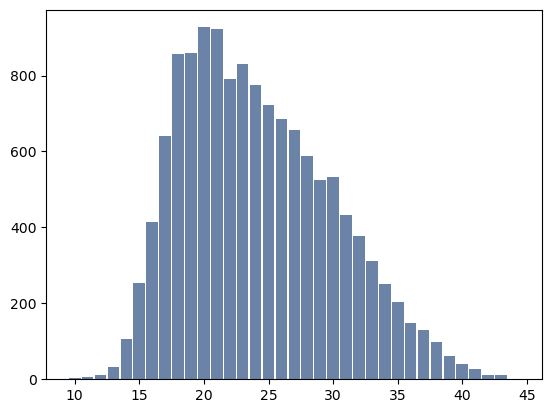

In [6]:
agepreg = [floor(_) for _ in dataset.agepreg.tolist() if not isnan(_)]
agepreg_hist = thinkstats2.Hist(agepreg)
thinkplot.hist(agepreg_hist)

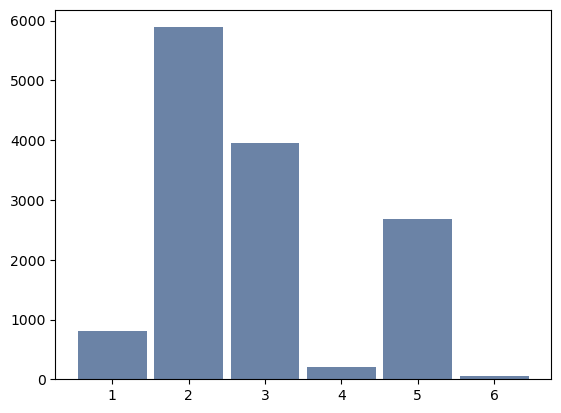

In [7]:
oldwantr = [floor(_) for _ in dataset.oldwantr.tolist() if not isnan(_)]
oldwantr_hist = thinkstats2.Hist(oldwantr)
thinkplot.hist(oldwantr_hist)

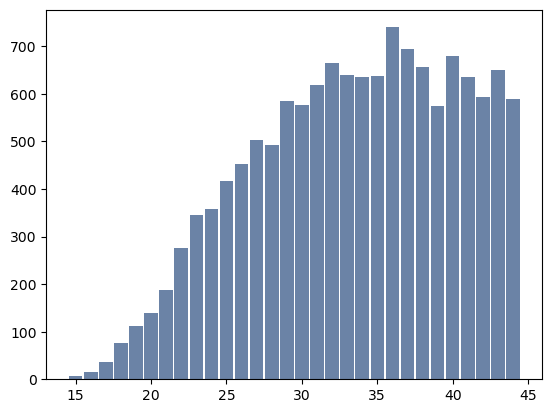

In [8]:
ager = [floor(_) for _ in dataset.ager.tolist() if not isnan(_)]
ager_hist = thinkstats2.Hist(ager)
thinkplot.hist(ager_hist)

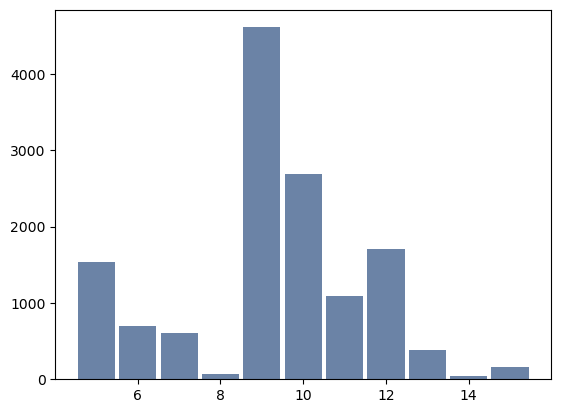

In [9]:
hieduc = [floor(_) for _ in dataset.hieduc.tolist() if not isnan(_)]
hieduc_hist = thinkstats2.Hist(hieduc)
thinkplot.hist(hieduc_hist)

In [10]:
dataset.isna().sum()

caseid        0
agepreg     352
oldwantr      0
ager          0
hieduc        0
dtype: int64

Some of the selected variables only agepreg has a possibility of having a 
null value due to the respondent not wanting to share the information to the
 surveyors

In [11]:
age_variance = np.var(agepreg)
oldwantr_variance = np.var(oldwantr)
ager_variance = np.var(ager)
hieduc_variance = np.var(hieduc)

In [12]:
def print_desc(dataset,column,variance):
    dataset = dataset[column]
    print(f"""Age of Pregnancy: 
    Mean : {round(dataset.mean(),2)}
    Mode: {round(dataset.mode().tolist()[0])}
    Spread : {max(dataset.tolist())-min(dataset.tolist())} 
    Variance: {variance}\n""")

In [13]:
print_desc(dataset,"agepreg",age_variance)
print_desc(dataset,"oldwantr",oldwantr_variance)
print_desc(dataset,"ager",ager_variance)
print_desc(dataset,"hieduc",hieduc_variance)


Age of Pregnancy: 
    Mean : 24.69
    Mode: 23
    Spread : 33.75 
    Variance: 33.9199272688616

Age of Pregnancy: 
    Mean : 2.87
    Mode: 2
    Spread : 5 
    Variance: 1.4898732312902754

Age of Pregnancy: 
    Mean : 33.47
    Mode: 36
    Spread : 29 
    Variance: 45.09738413801933

Age of Pregnancy: 
    Mean : 9.24
    Mode: 9
    Spread : 10 
    Variance: 5.004351477660706



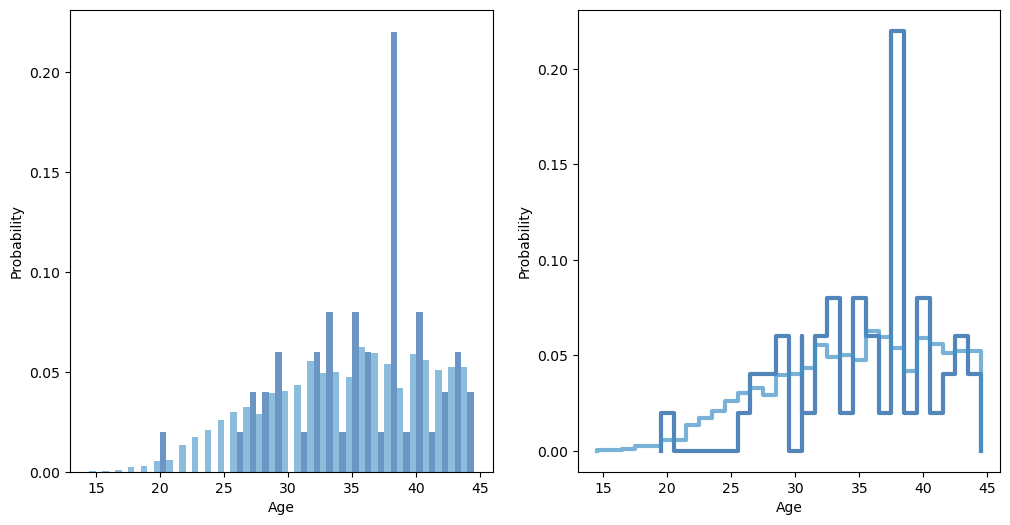

<Figure size 800x600 with 0 Axes>

In [14]:
# Ages of unwanted pregnancy
age_unwanted = thinkstats2.Pmf(dataset[dataset["oldwantr"] == 6]["ager"])

# Ages of wanted pregnancy
age_wanted = thinkstats2.Pmf(dataset[dataset["oldwantr"] == 2]["ager"])

thinkplot.preplot(2,cols=2)
thinkplot.hist(age_unwanted,align="left", width=.5)
thinkplot.hist(age_wanted,align="right", width=.5)
thinkplot.config(xlabel="Age" , ylabel="Probability")

thinkplot.preplot(2)
thinkplot.subplot(2)
thinkplot.Pmfs([age_unwanted, age_wanted])
thinkplot.Show(xlabel="Age" , ylabel="Probability")


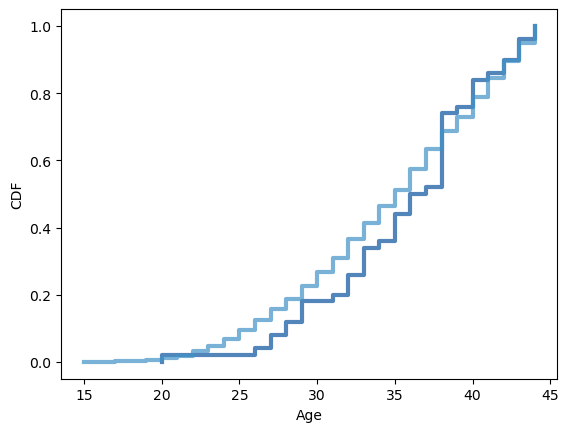

<Figure size 800x600 with 0 Axes>

In [15]:
# Ages of unwanted pregnancy
age_unwanted_cdf = thinkstats2.Cdf(dataset[dataset["oldwantr"] == 6]["ager"])

# Ages of wanted pregnancy
age_wanted_cdf = thinkstats2.Cdf(dataset[dataset["oldwantr"] == 2]["ager"])


thinkplot.preplot(2)
thinkplot.cdfs([age_unwanted_cdf, age_wanted_cdf])
thinkplot.Show(xlabel="Age" , ylabel="CDF")

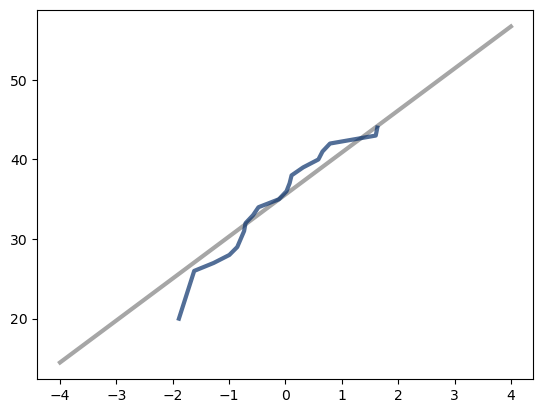

In [16]:
import scipy.stats

mu = dataset[dataset["oldwantr"] == 6]["ager"].mean()
sigma = np.std(dataset[dataset["oldwantr"] == 6]["ager"].tolist())
np_age_unwanted = np.array(age_unwanted)

xs = [-4,4]
fxs, fys = thinkstats2.FitLine(xs, inter=mu, slope=sigma)
thinkplot.Plot(fxs, fys, color="grey", label='model')

xs, ys = thinkstats2.NormalProbability(np_age_unwanted)
thinkplot.Plot(xs,ys)

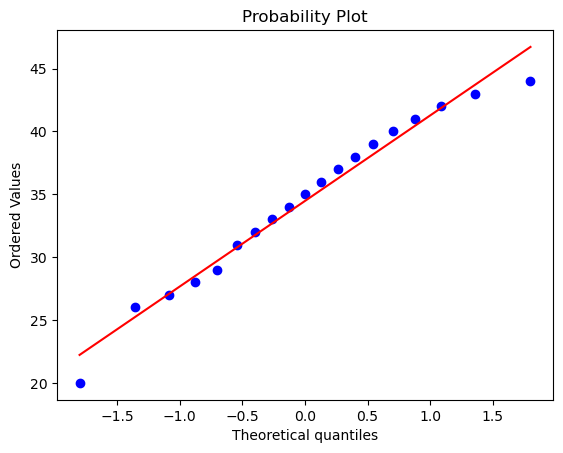

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(np_age_unwanted, dist="norm", plot=plt)
plt.show()

In [18]:
from scipy.stats import shapiro
stat, p_value = shapiro(np_age_unwanted)
print(f"Statistic: {stat}, P-value: {p_value}")
if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")


Statistic: 0.9700273275375366, P-value: 0.7770063877105713
Data is normally distributed


The normal distribution is best fit for the data as the datapoints are close
 to the Q-Q line for a normal distribution. Another test we can do is to do 
 a Shapiro-Wilk Test to test p values to see if it is normally distributed

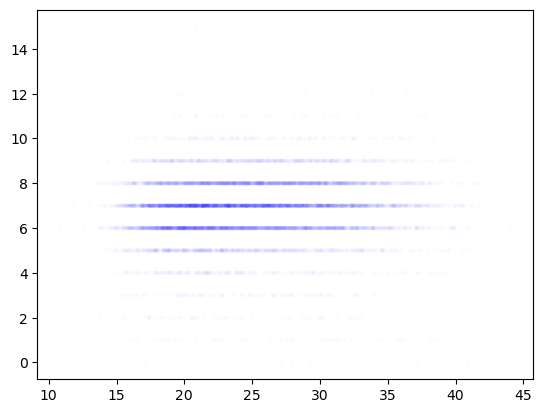

In [56]:
agepreg = []
birthwgt_lb = []
for _,__ in zip(dataset.agepreg.tolist(),dataset.birthwgt_lb.tolist()):
    if not isnan(_):
        agepreg.append(_)
        birthwgt_lb.append(__)
thinkplot.scatter(agepreg, birthwgt_lb,alpha=.01, s=10)

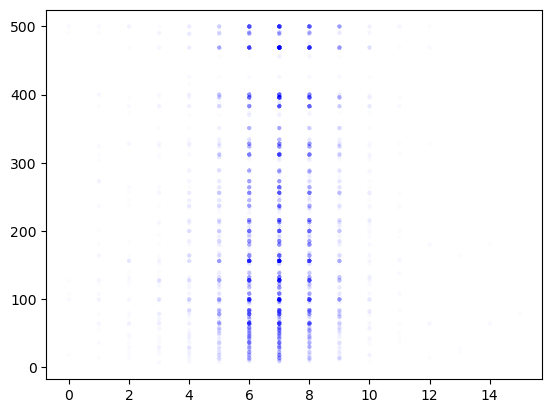

In [59]:
birthwgt_lb = []
poverty = []
for _,__ in zip(dataset.birthwgt_lb.tolist(),dataset.poverty.tolist()):
    if not isnan(_):
        birthwgt_lb.append(_)
        poverty.append(__)
thinkplot.scatter(birthwgt_lb, poverty,alpha=.01, s=10)


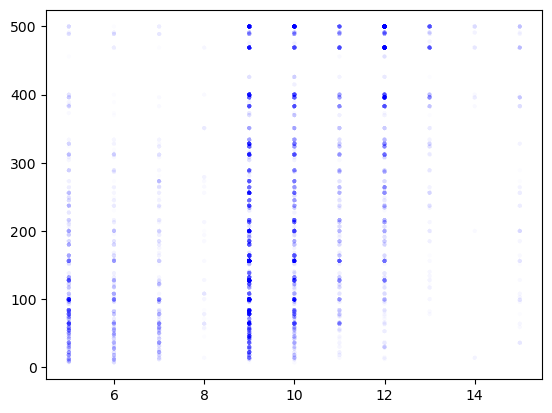

In [182]:
hieduc = []
poverty = []
for _,__ in zip(dataset.hieduc.tolist(),dataset.poverty.tolist()):
    if not isnan(_):
        hieduc.append(_)
        poverty.append(__)
thinkplot.scatter(hieduc, poverty,alpha=.01, s=10)


In [179]:
import first
import hypothesis
def RunTests(live, iters=1000):
    """Runs the tests from Chapter 9 with a subset of the data.

    live: DataFrame
    iters: how many iterations to run
    """
    n = len(live)
    over_20 = live[live.agepreg > 20]
    less_eq_20 = live[live.agepreg <= 20]

    # compare pregnancy lengths
    data = over_20.totalwgt_lb.values, less_eq_20.totalwgt_lb.values
    ht = hypothesis.DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    # test correlation
    live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = live2.agepreg.values, live2.totalwgt_lb.values
    ht = hypothesis.CorrelationPermute(data)
    p2 = ht.PValue(iters=iters)

    # compare pregnancy lengths (chi-squared)
    data = over_20.prglngth.values, less_eq_20.prglngth.values
    ht = hypothesis.PregLengthTest(data)
    p3 = ht.PValue(iters=iters)

    print(f"Record Count: {n}, Mean: {p1}, Correlation: {p2}, Chi-Squared: "
          f"{p3}")

In [180]:
live, firsts, others = first.MakeFrames()
n = len(live)
for _ in range(7):
    sample = thinkstats2.SampleRows(live, n)
    RunTests(sample)
    n //= 2

Record Count: 9148, Mean: 0.0, Correlation: 0.0, Chi-Squared: 0.0
Record Count: 4574, Mean: 0.0, Correlation: 0.0, Chi-Squared: 0.027
Record Count: 2287, Mean: 0.0, Correlation: 0.009, Chi-Squared: 0.326
Record Count: 1143, Mean: 0.0, Correlation: 0.006, Chi-Squared: 0.366
Record Count: 571, Mean: 0.0, Correlation: 0.018, Chi-Squared: 0.176
Record Count: 285, Mean: 0.0, Correlation: 0.172, Chi-Squared: 0.214
Record Count: 142, Mean: 0.0, Correlation: 0.609, Chi-Squared: 0.717


In [199]:
import statsmodels.formula.api as smf

poverty_over_20 = live[live.agepreg > 20].poverty.mean()
poverty_less_eq_20 = live[live.agepreg <= 20].poverty.mean()

birthwgt_lb_over_20 = live[live.agepreg > 20].birthwgt_lb.mean()
birthwgt_lb_less_eq_20 = live[live.agepreg <= 20].birthwgt_lb.mean()

diff_poverty = poverty_over_20 - poverty_less_eq_20
diff_birthwgt = birthwgt_lb_over_20 - birthwgt_lb_less_eq_20

results = smf.ols("birthwgt_lb ~ poverty" , data=dataset).fit()
slope = results.params["poverty"]

In [198]:
diff_poverty

56.30875428671931